In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('C:/Users/govindd1/Desktop/Code/VR-Project/ACC_data_from_different_subjects/E4_ACC_data.csv')
df.head()

,datatime,acc_x,acc_y,acc_z,label,subject_id,round,type
0,2021-10-27 16:19:17+00:00,-14,22,55,standing,2,1,MotionLess
1,2021-10-27 16:19:17.031250+00:00,-4,25,61,standing,2,1,MotionLess
2,2021-10-27 16:19:17.062500+00:00,-7,21,59,standing,2,1,MotionLess
3,2021-10-27 16:19:17.093750+00:00,-15,20,59,standing,2,1,MotionLess
4,2021-10-27 16:19:17.125000+00:00,-11,22,66,standing,2,1,MotionLess


In [3]:
# df = df.drop('round', 1)
# df.head()

In [4]:
df.shape


(137406, 8)

In [5]:
df['Magnitude'] = np.sqrt(df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)
df['Magnitude']

0         60.868711
1         66.045439
2         63.015871
3         64.078077
4         70.434367
            ...    
137401    49.284886
137402    53.235327
137403    60.274373
137404    66.835619
137405    79.686887
Name: Magnitude, Length: 137406, dtype: float64

In [6]:
df

,datatime,acc_x,acc_y,acc_z,label,subject_id,round,type,Magnitude
0,2021-10-27 16:19:17+00:00,-14,22,55,standing,2,1,MotionLess,60.868711
1,2021-10-27 16:19:17.031250+00:00,-4,25,61,standing,2,1,MotionLess,66.045439
2,2021-10-27 16:19:17.062500+00:00,-7,21,59,standing,2,1,MotionLess,63.015871
3,2021-10-27 16:19:17.093750+00:00,-15,20,59,standing,2,1,MotionLess,64.078077
4,2021-10-27 16:19:17.125000+00:00,-11,22,66,standing,2,1,MotionLess,70.434367
...,...,...,...,...,...,...,...,...,...
137401,2021-10-27 16:25:50.906250+00:00,-24,22,37,walking,3,1,InMotion,49.284886
137402,2021-10-27 16:25:50.937500+00:00,-20,15,47,walking,3,1,InMotion,53.235327
137403,2021-10-27 16:25:50.968750+00:00,-10,13,58,walking,3,1,InMotion,60.274373
137404,2021-10-27 16:25:51+00:00,-11,11,65,walking,3,1,InMotion,66.835619


In [7]:
acc_df = df.copy()
acc_df


,datatime,acc_x,acc_y,acc_z,label,subject_id,round,type,Magnitude
0,2021-10-27 16:19:17+00:00,-14,22,55,standing,2,1,MotionLess,60.868711
1,2021-10-27 16:19:17.031250+00:00,-4,25,61,standing,2,1,MotionLess,66.045439
2,2021-10-27 16:19:17.062500+00:00,-7,21,59,standing,2,1,MotionLess,63.015871
3,2021-10-27 16:19:17.093750+00:00,-15,20,59,standing,2,1,MotionLess,64.078077
4,2021-10-27 16:19:17.125000+00:00,-11,22,66,standing,2,1,MotionLess,70.434367
...,...,...,...,...,...,...,...,...,...
137401,2021-10-27 16:25:50.906250+00:00,-24,22,37,walking,3,1,InMotion,49.284886
137402,2021-10-27 16:25:50.937500+00:00,-20,15,47,walking,3,1,InMotion,53.235327
137403,2021-10-27 16:25:50.968750+00:00,-10,13,58,walking,3,1,InMotion,60.274373
137404,2021-10-27 16:25:51+00:00,-11,11,65,walking,3,1,InMotion,66.835619


In [8]:
sitting = acc_df[acc_df['label']=='sitting'].head(4857).copy()
standing = acc_df[acc_df['label']=='standing'].head(4857).copy()
walking = acc_df[acc_df['label']=='walking'].head(4857).copy()
upstairs = acc_df[acc_df['label']=='upstairs'].head(4857).copy()
downstairs = acc_df[acc_df['label']=='downstairs'].head(4857).copy()

acc_df = pd.DataFrame()
acc_df = acc_df.append([sitting, standing, walking, upstairs, downstairs])
acc_df.shape


(24285, 9)

In [9]:
acc_df

,datatime,acc_x,acc_y,acc_z,label,subject_id,round,type,Magnitude
23609,2021-10-27 16:22:23+00:00,-18,46,39,sitting,2,1,MotionLess,62.936476
23610,2021-10-27 16:22:23.031250+00:00,-19,46,43,sitting,2,1,MotionLess,65.772335
23611,2021-10-27 16:22:23.062500+00:00,-15,50,44,sitting,2,1,MotionLess,68.271517
23612,2021-10-27 16:22:23.093750+00:00,-6,53,44,sitting,2,1,MotionLess,69.144776
23613,2021-10-27 16:22:23.125000+00:00,-5,43,41,sitting,2,1,MotionLess,59.623821
...,...,...,...,...,...,...,...,...,...
23604,2021-11-09 01:13:23.843750+00:00,14,-59,13,downstairs,5,1,InMotion,62.016127
23605,2021-11-09 01:13:23.875000+00:00,17,-60,17,downstairs,5,1,InMotion,64.637450
23606,2021-11-09 01:13:23.906250+00:00,18,-61,20,downstairs,5,1,InMotion,66.670833
23607,2021-11-09 01:13:23.937500+00:00,19,-59,27,downstairs,5,1,InMotion,67.609171


In [10]:
#co-variance btw x and y
cov_df = acc_df.cov()
cov_df



,acc_x,acc_y,acc_z,subject_id,round,Magnitude
acc_x,818.641517,289.414553,262.053685,-2.078199,0.0,-18.112234
acc_y,289.414553,2068.077859,-302.438552,-12.402797,0.0,464.948590
acc_z,262.053685,-302.438552,846.035354,0.994890,0.0,-69.394717
subject_id,-2.078199,-12.402797,0.994890,0.504394,0.0,-0.472610
round,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
Magnitude,-18.112234,464.948590,-69.394717,-0.472610,0.0,373.613136


In [11]:
cov_mat =cov_df.values
cov_mat

array([[ 8.18641517e+02,  2.89414553e+02,  2.62053685e+02,
        -2.07819888e+00,  0.00000000e+00, -1.81122337e+01],
       [ 2.89414553e+02,  2.06807786e+03, -3.02438552e+02,
        -1.24027974e+01,  0.00000000e+00,  4.64948590e+02],
       [ 2.62053685e+02, -3.02438552e+02,  8.46035354e+02,
         9.94889901e-01,  0.00000000e+00, -6.93947173e+01],
       [-2.07819888e+00, -1.24027974e+01,  9.94889901e-01,
         5.04393576e-01,  0.00000000e+00, -4.72609906e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.81122337e+01,  4.64948590e+02, -6.93947173e+01,
        -4.72609906e-01,  0.00000000e+00,  3.73613136e+02]])

In [12]:
cov_x_y = cov_mat[0][1]
cov_y_z = cov_mat[1][3]
cov_x_z = cov_mat[0][2]
print(cov_x_y, cov_y_z, cov_x_z)

df['cov_x_y'] = cov_x_y
df['cov_y_z'] = cov_y_z
df['cov_x_z'] = cov_x_z


289.4145527258304 -12.40279742015143 262.05368544999067


In [13]:
df

,datatime,acc_x,acc_y,acc_z,label,subject_id,round,type,Magnitude,cov_x_y,cov_y_z,cov_x_z
0,2021-10-27 16:19:17+00:00,-14,22,55,standing,2,1,MotionLess,60.868711,289.414553,-12.402797,262.053685
1,2021-10-27 16:19:17.031250+00:00,-4,25,61,standing,2,1,MotionLess,66.045439,289.414553,-12.402797,262.053685
2,2021-10-27 16:19:17.062500+00:00,-7,21,59,standing,2,1,MotionLess,63.015871,289.414553,-12.402797,262.053685
3,2021-10-27 16:19:17.093750+00:00,-15,20,59,standing,2,1,MotionLess,64.078077,289.414553,-12.402797,262.053685
4,2021-10-27 16:19:17.125000+00:00,-11,22,66,standing,2,1,MotionLess,70.434367,289.414553,-12.402797,262.053685
...,...,...,...,...,...,...,...,...,...,...,...,...
137401,2021-10-27 16:25:50.906250+00:00,-24,22,37,walking,3,1,InMotion,49.284886,289.414553,-12.402797,262.053685
137402,2021-10-27 16:25:50.937500+00:00,-20,15,47,walking,3,1,InMotion,53.235327,289.414553,-12.402797,262.053685
137403,2021-10-27 16:25:50.968750+00:00,-10,13,58,walking,3,1,InMotion,60.274373,289.414553,-12.402797,262.053685
137404,2021-10-27 16:25:51+00:00,-11,11,65,walking,3,1,InMotion,66.835619,289.414553,-12.402797,262.053685


In [15]:
columns = ['acc_x', 'acc_y', 'acc_z', 'Magnitude', 'label', 'subject_id', 'cov_x_y', 'cov_y_z', 'cov_x_z']
acc_df = pd.DataFrame(data = df, columns = columns)
acc_df

,acc_x,acc_y,acc_z,Magnitude,label,subject_id,cov_x_y,cov_y_z,cov_x_z
0,-14,22,55,60.868711,standing,2,289.414553,-12.402797,262.053685
1,-4,25,61,66.045439,standing,2,289.414553,-12.402797,262.053685
2,-7,21,59,63.015871,standing,2,289.414553,-12.402797,262.053685
3,-15,20,59,64.078077,standing,2,289.414553,-12.402797,262.053685
4,-11,22,66,70.434367,standing,2,289.414553,-12.402797,262.053685
...,...,...,...,...,...,...,...,...,...
137401,-24,22,37,49.284886,walking,3,289.414553,-12.402797,262.053685
137402,-20,15,47,53.235327,walking,3,289.414553,-12.402797,262.053685
137403,-10,13,58,60.274373,walking,3,289.414553,-12.402797,262.053685
137404,-11,11,65,66.835619,walking,3,289.414553,-12.402797,262.053685


In [16]:
from window_slider import Slider


def make_windows(df, bucket_size, overlap_count):
    window_list = []
    final = pd.DataFrame()
    activity_list = list(df['label'].unique()) #list of the four activities
    sub_id_list = list(df['subject_id'].unique())#list of the subject ids
    co_variance_x_y = list(df['cov_x_y'].unique())
    co_variance_y_z = list(df['cov_y_z'].unique())
    co_variance_x_z = list(df['cov_x_z'].unique())

    # round_list = list(df['round'].unique())
    df_list = []


    for i in sub_id_list:
        df_subject = df[df['subject_id'] == i] #isolate a single subject id
        
        for j in activity_list:
            df_subject_activity = df_subject[df_subject['label'] == j] #isolate by activity
            
            for k in co_variance_x_y:
                df_cov_x_y = df_subject_activity[df_subject_activity['cov_x_y'] == k]
                
                for l in co_variance_y_z:
                    df_cov_y_z = df_cov_x_y[df_cov_x_y['cov_y_z'] == l]
                    
                    for m in co_variance_x_z:
                        df_cov_x_z = df_cov_y_z[df_cov_y_z['cov_x_z'] == m]
                        
                        final_df = pd.DataFrame()
                        if df_subject.empty:
                                pass
                        else:
                            df_flat = df_subject[['acc_x', 'acc_y', 'acc_z', 'Magnitude']].T.values #array of arrays, each row is every single reading in an array for a sensor in that isolation 

                            slider = Slider(bucket_size,overlap_count)
                            slider.fit(df_flat)
                            while True:
                                window_data = slider.slide()

                                if slider.reached_end_of_list(): break
                                window_list.append(list(window_data))
                            final_df = final.append(window_list)
                            final_df.columns = [['acc_x', 'acc_y', 'acc_z', 'Magnitude']]
                            final_df.insert(4, "subject_id", [i]*len(final_df), True)
                            final_df.insert(5, "label", [j]*len(final_df), True)
                            final_df.insert(6, 'cov_x_y', [k]*len(final_df), True)
                            final_df.insert(7, 'cov_y_z', [l]*len(final_df), True)
                            final_df.insert(8, 'cov_x_z', [m]*len(final_df), True)
                            
                            
                    
                            df_list.append(final_df)
                            window_list = []

    final = pd.DataFrame(columns = df_list[0].columns)

    for l in df_list:
        final = final.append(l)


    final
    final.columns = final.columns.map(''.join)
    return final

In [17]:
df2 = make_windows(acc_df, 128, 64)

In [18]:
df2

,acc_x,acc_y,acc_z,Magnitude,subject_id,label,cov_x_y,cov_y_z,cov_x_z
0,"[-14.0, -4.0, -7.0, -15.0, -11.0, -10.0, -18.0...","[22.0, 25.0, 21.0, 20.0, 22.0, 29.0, 32.0, 21....","[55.0, 61.0, 59.0, 59.0, 66.0, 75.0, 68.0, 54....","[60.868711174132805, 66.04543890383347, 63.015...",2,standing,289.414553,-12.402797,262.053685
1,"[-56.0, -56.0, -55.0, -51.0, -56.0, -59.0, -59...","[4.0, 3.0, 2.0, -2.0, -3.0, -6.0, -6.0, -4.0, ...","[-33.0, -36.0, -38.0, -40.0, -43.0, -46.0, -47...","[65.12296062065974, 66.64082832618455, 66.8804...",2,standing,289.414553,-12.402797,262.053685
2,"[-63.0, -63.0, -63.0, -63.0, -64.0, -63.0, -61...","[-14.0, -14.0, -14.0, -14.0, -14.0, -14.0, -15...","[-8.0, -9.0, -11.0, -12.0, -12.0, -11.0, -10.0...","[65.03076195155643, 65.16133823057964, 65.4675...",2,standing,289.414553,-12.402797,262.053685
3,"[-65.0, -65.0, -61.0, -63.0, -64.0, -64.0, -60...","[-13.0, -13.0, -13.0, -13.0, -13.0, -13.0, -13...","[-5.0, -7.0, -7.0, -7.0, -7.0, -7.0, -4.0, -6....","[66.47555941848101, 66.65583245298194, 62.7614...",2,standing,289.414553,-12.402797,262.053685
4,"[-68.0, -68.0, -65.0, -65.0, -65.0, -64.0, -64...","[-8.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7.0, -7....","[3.0, 4.0, 7.0, 8.0, 9.0, 10.0, 10.0, 11.0, 12...","[68.53466276272175, 68.47627326307996, 65.7495...",2,standing,289.414553,-12.402797,262.053685
...,...,...,...,...,...,...,...,...,...
550,"[-39.0, -40.0, -40.0, -40.0, -41.0, -35.0, -26...","[-36.0, -38.0, -40.0, -41.0, -44.0, -44.0, -41...","[20.0, 20.0, 18.0, 15.0, 13.0, 13.0, 18.0, 27....","[56.71860364994893, 58.68560300448484, 59.3632...",3,walking,289.414553,-12.402797,262.053685
551,"[-62.0, -62.0, -63.0, -63.0, -62.0, -62.0, -61...","[-6.0, -6.0, -7.0, -7.0, -5.0, -4.0, -6.0, -6....","[15.0, 16.0, 16.0, 16.0, 17.0, 17.0, 16.0, 16....","[64.07027391856539, 64.31174076325411, 65.3758...",3,walking,289.414553,-12.402797,262.053685
552,"[-64.0, -63.0, -63.0, -63.0, -64.0, -65.0, -63...","[-7.0, -7.0, -6.0, -5.0, -5.0, -7.0, -7.0, -8....","[11.0, 12.0, 11.0, 9.0, 7.0, 6.0, 7.0, 8.0, 11...","[65.31462317123173, 64.51356446515724, 64.2339...",3,walking,289.414553,-12.402797,262.053685
553,"[-49.0, -46.0, -42.0, -41.0, -44.0, -54.0, -57...","[-10.0, -12.0, -15.0, -18.0, -24.0, -25.0, -23...","[17.0, 16.0, 15.0, 12.0, 7.0, 1.0, 0.0, 0.0, 1...","[52.820450584977024, 50.15974481593781, 47.053...",3,walking,289.414553,-12.402797,262.053685


In [19]:
df3 = df2.copy()
for i in df3[['acc_x', 'acc_y', 'acc_z', 'Magnitude']].columns:
    df3[i] = df3[i].map(lambda x: np.mean(x))
df3.columns = df3.columns + "_mean"
df3

,acc_x_mean,acc_y_mean,acc_z_mean,Magnitude_mean,subject_id_mean,label_mean,cov_x_y_mean,cov_y_z_mean,cov_x_z_mean
0,-51.554688,5.187500,6.734375,64.668330,2,standing,289.414553,-12.402797,262.053685
1,-61.507812,-10.351562,-13.398438,64.890871,2,standing,289.414553,-12.402797,262.053685
2,-63.726562,-12.468750,-6.304688,65.320135,2,standing,289.414553,-12.402797,262.053685
3,-52.976562,-3.515625,16.992188,65.714283,2,standing,289.414553,-12.402797,262.053685
4,-35.429688,4.250000,47.671875,64.333577,2,standing,289.414553,-12.402797,262.053685
...,...,...,...,...,...,...,...,...,...
550,-60.687500,-9.710938,13.617188,64.819176,3,walking,289.414553,-12.402797,262.053685
551,-63.125000,-5.726562,12.328125,64.764375,3,walking,289.414553,-12.402797,262.053685
552,-63.453125,-7.429688,5.125000,64.861652,3,walking,289.414553,-12.402797,262.053685
553,-63.570312,-7.929688,-7.000000,65.649269,3,walking,289.414553,-12.402797,262.053685


In [20]:
df4 = df2.copy()
for i in df4[['acc_x', 'acc_y', 'acc_z', 'Magnitude']].columns:
    df4[i] = df4[i].map(lambda x: np.std(x))
df4.columns = df4.columns + "_std"
df4

,acc_x_std,acc_y_std,acc_z_std,Magnitude_std,subject_id_std,label_std,cov_x_y_std,cov_y_z_std,cov_x_z_std
0,14.665440,13.090878,33.004849,4.890926,2,standing,289.414553,-12.402797,262.053685
1,3.960737,4.731196,10.635539,3.200804,2,standing,289.414553,-12.402797,262.053685
2,2.330889,1.980126,2.396477,2.161150,2,standing,289.414553,-12.402797,262.053685
3,18.443946,9.958495,27.909031,2.740067,2,standing,289.414553,-12.402797,262.053685
4,15.292300,6.486765,17.998745,2.647859,2,standing,289.414553,-12.402797,262.053685
...,...,...,...,...,...,...,...,...,...
550,11.870887,10.063977,6.985611,7.223402,3,walking,289.414553,-12.402797,262.053685
551,2.971216,2.470814,4.294090,2.913733,3,walking,289.414553,-12.402797,262.053685
552,5.695200,4.757697,8.341350,5.037876,3,walking,289.414553,-12.402797,262.053685
553,8.045460,5.154160,10.933749,7.353895,3,walking,289.414553,-12.402797,262.053685


In [21]:
frames = [df3, df4]
new_df = pd.concat(frames, axis =1)
new_df = pd.DataFrame(data= new_df)

In [22]:


new_df.columns

Index(['acc_x_mean', 'acc_y_mean', 'acc_z_mean', 'Magnitude_mean',
       'subject_id_mean', 'label_mean', 'cov_x_y_mean', 'cov_y_z_mean',
       'cov_x_z_mean', 'acc_x_std', 'acc_y_std', 'acc_z_std', 'Magnitude_std',
       'subject_id_std', 'label_std', 'cov_x_y_std', 'cov_y_z_std',
       'cov_x_z_std'],
      dtype='object')

In [23]:
new_df.iloc[:, :12]
# new_df = ['acc_x_mean',	'acc_y_mean',	'acc_z_mean', 'acc_x_std',	'acc_y_std', 'acc_z_std', "Magnitude_mean", 'cov_x_y_mean',	'cov_y_z_mean',	'cov_x_z_mean', 'label_mean']
# new_df

,acc_x_mean,acc_y_mean,acc_z_mean,Magnitude_mean,subject_id_mean,label_mean,cov_x_y_mean,cov_y_z_mean,cov_x_z_mean,acc_x_std,acc_y_std,acc_z_std
0,-51.554688,5.187500,6.734375,64.668330,2,standing,289.414553,-12.402797,262.053685,14.665440,13.090878,33.004849
1,-61.507812,-10.351562,-13.398438,64.890871,2,standing,289.414553,-12.402797,262.053685,3.960737,4.731196,10.635539
2,-63.726562,-12.468750,-6.304688,65.320135,2,standing,289.414553,-12.402797,262.053685,2.330889,1.980126,2.396477
3,-52.976562,-3.515625,16.992188,65.714283,2,standing,289.414553,-12.402797,262.053685,18.443946,9.958495,27.909031
4,-35.429688,4.250000,47.671875,64.333577,2,standing,289.414553,-12.402797,262.053685,15.292300,6.486765,17.998745
...,...,...,...,...,...,...,...,...,...,...,...,...
550,-60.687500,-9.710938,13.617188,64.819176,3,walking,289.414553,-12.402797,262.053685,11.870887,10.063977,6.985611
551,-63.125000,-5.726562,12.328125,64.764375,3,walking,289.414553,-12.402797,262.053685,2.971216,2.470814,4.294090
552,-63.453125,-7.429688,5.125000,64.861652,3,walking,289.414553,-12.402797,262.053685,5.695200,4.757697,8.341350
553,-63.570312,-7.929688,-7.000000,65.649269,3,walking,289.414553,-12.402797,262.053685,8.045460,5.154160,10.933749


In [24]:
columns = ['acc_x_mean',	'acc_y_mean',	'acc_z_mean', 'acc_x_std',	'acc_y_std', 'acc_z_std', "Magnitude_mean", 'cov_x_y_mean',	'cov_y_z_mean',	'cov_x_z_mean','subject_id_mean', 'label_mean']
new_df = pd.DataFrame(data = new_df, columns = columns)
new_df

,acc_x_mean,acc_y_mean,acc_z_mean,acc_x_std,acc_y_std,acc_z_std,Magnitude_mean,cov_x_y_mean,cov_y_z_mean,cov_x_z_mean,subject_id_mean,label_mean
0,-51.554688,5.187500,6.734375,14.665440,13.090878,33.004849,64.668330,289.414553,-12.402797,262.053685,2,standing
1,-61.507812,-10.351562,-13.398438,3.960737,4.731196,10.635539,64.890871,289.414553,-12.402797,262.053685,2,standing
2,-63.726562,-12.468750,-6.304688,2.330889,1.980126,2.396477,65.320135,289.414553,-12.402797,262.053685,2,standing
3,-52.976562,-3.515625,16.992188,18.443946,9.958495,27.909031,65.714283,289.414553,-12.402797,262.053685,2,standing
4,-35.429688,4.250000,47.671875,15.292300,6.486765,17.998745,64.333577,289.414553,-12.402797,262.053685,2,standing
...,...,...,...,...,...,...,...,...,...,...,...,...
550,-60.687500,-9.710938,13.617188,11.870887,10.063977,6.985611,64.819176,289.414553,-12.402797,262.053685,3,walking
551,-63.125000,-5.726562,12.328125,2.971216,2.470814,4.294090,64.764375,289.414553,-12.402797,262.053685,3,walking
552,-63.453125,-7.429688,5.125000,5.695200,4.757697,8.341350,64.861652,289.414553,-12.402797,262.053685,3,walking
553,-63.570312,-7.929688,-7.000000,8.045460,5.154160,10.933749,65.649269,289.414553,-12.402797,262.053685,3,walking


array([<AxesSubplot:>], dtype=object)

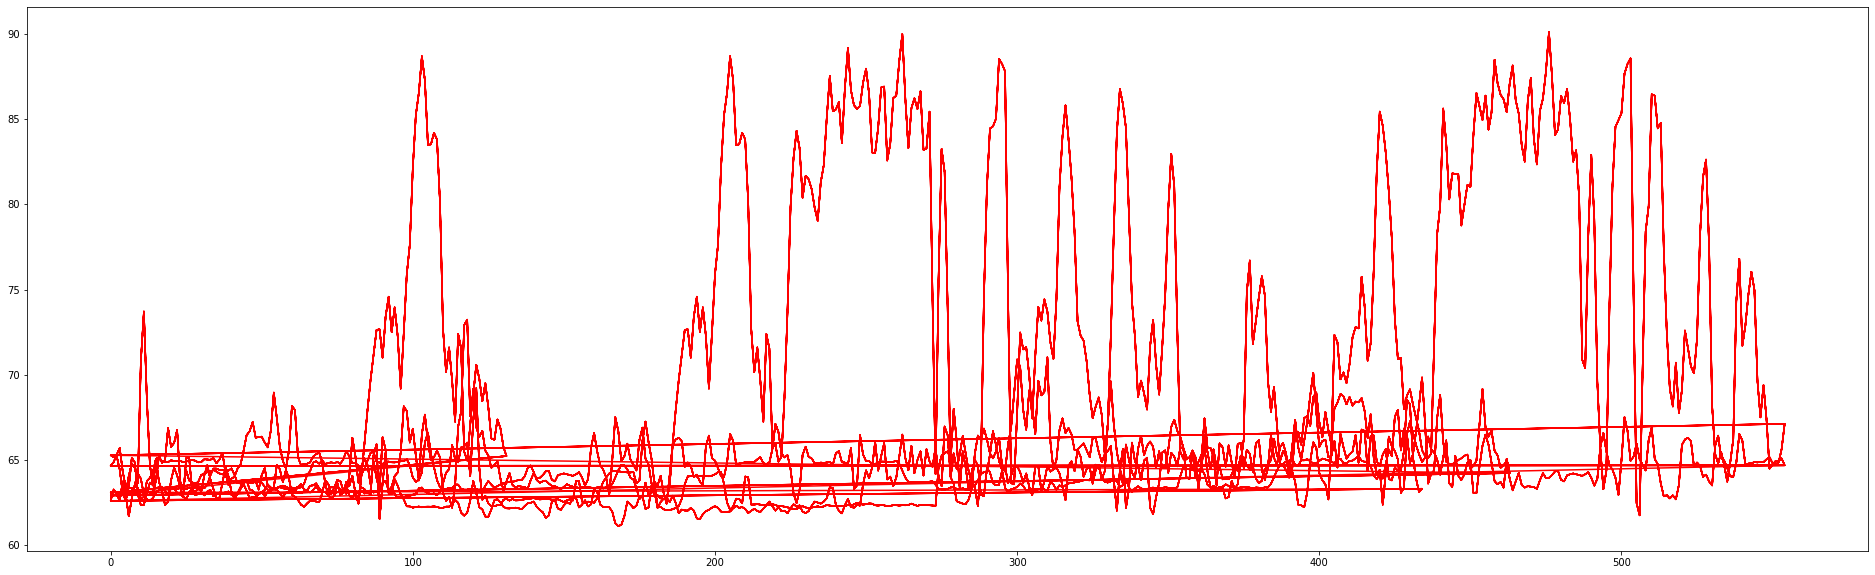

In [25]:
# df[['Magnitude_mean']].plot(subplots=True, figsize=(33, 10), color = 'red')

new_df['Magnitude_mean'].plot(subplots=True, figsize=(33, 10), color = 'red')

C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


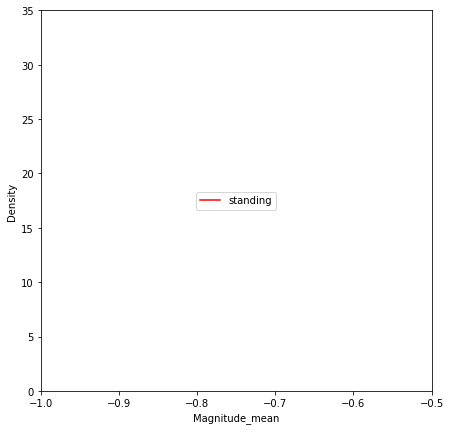

In [26]:
da1 = new_df[new_df['label_mean'] == 'standing']

plt.figure(figsize=(7,7))
sns.distplot(da1['Magnitude_mean'], color = 'r', hist = False, label = 'standing')
plt.axis([-1, -0.5, 0, 35])
plt.legend(loc = 'center')
plt.show()


In [27]:
new_df

,acc_x_mean,acc_y_mean,acc_z_mean,acc_x_std,acc_y_std,acc_z_std,Magnitude_mean,cov_x_y_mean,cov_y_z_mean,cov_x_z_mean,subject_id_mean,label_mean
0,-51.554688,5.187500,6.734375,14.665440,13.090878,33.004849,64.668330,289.414553,-12.402797,262.053685,2,standing
1,-61.507812,-10.351562,-13.398438,3.960737,4.731196,10.635539,64.890871,289.414553,-12.402797,262.053685,2,standing
2,-63.726562,-12.468750,-6.304688,2.330889,1.980126,2.396477,65.320135,289.414553,-12.402797,262.053685,2,standing
3,-52.976562,-3.515625,16.992188,18.443946,9.958495,27.909031,65.714283,289.414553,-12.402797,262.053685,2,standing
4,-35.429688,4.250000,47.671875,15.292300,6.486765,17.998745,64.333577,289.414553,-12.402797,262.053685,2,standing
...,...,...,...,...,...,...,...,...,...,...,...,...
550,-60.687500,-9.710938,13.617188,11.870887,10.063977,6.985611,64.819176,289.414553,-12.402797,262.053685,3,walking
551,-63.125000,-5.726562,12.328125,2.971216,2.470814,4.294090,64.764375,289.414553,-12.402797,262.053685,3,walking
552,-63.453125,-7.429688,5.125000,5.695200,4.757697,8.341350,64.861652,289.414553,-12.402797,262.053685,3,walking
553,-63.570312,-7.929688,-7.000000,8.045460,5.154160,10.933749,65.649269,289.414553,-12.402797,262.053685,3,walking


In [28]:
new_df = new_df.rename(columns={'acc_x_mean': 'accXmean', 'acc_y_mean': 'accYmean', 'acc_z_mean': 'accZmean', 'acc_x_std': 'accXstd', 'acc_y_std': 'accYstd', 'acc_z_std':'accZstd', 'Magnitude_mean': 'MagnitudeMean', 'cov_x_y_mean':'covXYmean','cov_y_z_mean': 'covYZmean','cov_x_z_mean':'covXZmean', 'subject_id_mean': 'subjectID', 'label_mean': 'label' })


In [29]:
new_df

,accXmean,accYmean,accZmean,accXstd,accYstd,accZstd,MagnitudeMean,covXYmean,covYZmean,covXZmean,subjectID,label
0,-51.554688,5.187500,6.734375,14.665440,13.090878,33.004849,64.668330,289.414553,-12.402797,262.053685,2,standing
1,-61.507812,-10.351562,-13.398438,3.960737,4.731196,10.635539,64.890871,289.414553,-12.402797,262.053685,2,standing
2,-63.726562,-12.468750,-6.304688,2.330889,1.980126,2.396477,65.320135,289.414553,-12.402797,262.053685,2,standing
3,-52.976562,-3.515625,16.992188,18.443946,9.958495,27.909031,65.714283,289.414553,-12.402797,262.053685,2,standing
4,-35.429688,4.250000,47.671875,15.292300,6.486765,17.998745,64.333577,289.414553,-12.402797,262.053685,2,standing
...,...,...,...,...,...,...,...,...,...,...,...,...
550,-60.687500,-9.710938,13.617188,11.870887,10.063977,6.985611,64.819176,289.414553,-12.402797,262.053685,3,walking
551,-63.125000,-5.726562,12.328125,2.971216,2.470814,4.294090,64.764375,289.414553,-12.402797,262.053685,3,walking
552,-63.453125,-7.429688,5.125000,5.695200,4.757697,8.341350,64.861652,289.414553,-12.402797,262.053685,3,walking
553,-63.570312,-7.929688,-7.000000,8.045460,5.154160,10.933749,65.649269,289.414553,-12.402797,262.053685,3,walking


In [30]:
X = new_df[['accXmean',	'accYmean',	'accZmean',	'accXstd',	'accYstd',	'accZstd',	'MagnitudeMean', 'covXYmean',	'covYZmean',	'covXZmean']]
# X = new_df[['accXmean',	'accYmean',	'accZmean',	'accXstd',	'accYstd',	'accZstd']]

y = new_df['label']

In [31]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# scaled_X = pd.DataFrame(data = X, columns = ['accXmean',	'accYmean',	'accZmean',	'accXstd',	'accYstd',	'accZstd',	'MagnitudeMean', 'covXYmean',	'covYZmean',	'covXZmean'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
X_train

,accXmean,accYmean,accZmean,accXstd,accYstd,accZstd,MagnitudeMean,covXYmean,covYZmean,covXZmean
357,15.007812,-61.453125,8.015625,8.074358,20.065074,8.965197,65.105405,289.414553,-12.402797,262.053685
76,-17.234375,-1.585938,59.953125,7.419868,6.358468,11.709277,62.976371,289.414553,-12.402797,262.053685
234,47.203125,-6.640625,39.882812,5.269843,1.379166,4.704753,62.515830,289.414553,-12.402797,262.053685
119,10.148438,-16.468750,59.539062,0.992864,1.457403,2.674832,62.626867,289.414553,-12.402797,262.053685
35,42.789062,42.765625,17.382812,2.037356,1.486840,1.305763,62.996156,289.414553,-12.402797,262.053685
...,...,...,...,...,...,...,...,...,...,...
276,37.937500,40.406250,32.234375,20.066978,17.680956,18.137704,66.974616,289.414553,-12.402797,262.053685
91,-1.882812,-16.617188,52.000000,26.237086,21.992940,17.125000,65.611230,289.414553,-12.402797,262.053685
193,-14.117188,54.890625,29.820312,1.518743,0.731377,1.208263,64.072699,289.414553,-12.402797,262.053685
235,-63.671875,-7.875000,-9.460938,0.650833,0.612372,0.738478,64.857571,289.414553,-12.402797,262.053685


C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.025688930406352173

 ------------------------------------------ KNeighborsClassifier(n_neighbors=3) Classification Report-------------------------------------------------

              precision    recall  f1-score   support

  downstairs       0.03      0.09      0.05       442
     sitting       0.02      0.03      0.02       430
    standing       0.01      0.01      0.01       433
    upstairs       0.00      0.00      0.00       428
     walking       0.00      0.00      0.00       408

    accuracy                           0.03      2141
   macro avg       0.01      0.03      0.02      2141
weighted avg       0.01      0.03      0.02      2141



C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


 ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------


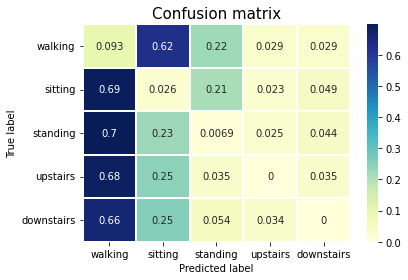

----------------------------------------------  KNeighborsClassifier(n_neighbors=3) K-Fold Report  ------------------------------------------------------ 

 * Results: [0.05137786 0.05744979 0.05044372 0.04717422]

 * Average acuracy: 0.05161139654367118 

<--------------------------------------------------------   END   ------------------------------------------------------------------>


In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score



classifiers = [
KNeighborsClassifier(3)
# SVC(kernel="rbf", C=0.025, probability=True),
# NuSVC(probability=True),
# RandomForestClassifier()
# DecisionTreeClassifier()
# AdaBoostClassifier()
# GradientBoostingClassifier()
]
for classifier in classifiers:
# pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                   ('classifier', classifier)])
# pipe.fit(X_train, y_train)   
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n ------------------------------------------", classifier , "Classification Report-------------------------------------------------\n")
    print(classification_report(y_test, y_pred))    

# K-Fold 
kfold = 4
results = cross_val_score(classifier, X_train, y_train, cv=kfold)


print(" ------------------------------------------------------  Confusion Matrix ----------------------------------------------------------")
labels = ['walking', 'sitting', 'standing', 'upstairs', 'downstairs']
_y_test = y_test
_y_pred = y_pred
confusion_matrix = confusion_matrix(_y_test, _y_pred)
confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix, xticklabels=labels, yticklabels=labels, annot=True,linewidths = 0.1, cmap = "YlGnBu")
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

# print(" ------------------------------------------------------ AUC SCORE -------------------------------------------------------------------")
# skplt.metrics.plot_roc_curve(y_test, y_pred)
# plt.show()
    
print("---------------------------------------------- ", classifier , "K-Fold Report  ------------------------------------------------------", "\n")
# print("model score: %.3f" % pipe.score(X_test, y_test))
# print('------------------------------------   REPORT   ----------------------------------', "\n")
print(' * Results: {}'.format(results))
print('\n * Average acuracy: {}'.format(np.mean(results)), "\n")

print('<--------------------------------------------------------   END   ------------------------------------------------------------------>')